<a href="https://colab.research.google.com/github/ghdakrk/-NLP-/blob/main/probability_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
활용
  - 철자 및 문법교정
  - 음성인식
  - 자동 번역
  - 자동 요약
  - 챗봇
'''

'\n활용\n  - 철자 및 문법교정\n  - 음성인식\n  - 자동 번역\n  - 자동 요약\n  - 챗봇\n'

In [14]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,124 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and d

In [1]:
# 바이그램 모델 만들기
from nltk.corpus import movie_reviews
from nltk.util import ngrams

In [2]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS",
                    right_pad_symbol="SE")
    sentences += [t for t in bigram]

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
sentences[:17]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE')]

In [4]:
# conditionalFreqdist 클래스 객체생성
from nltk import ConditionalFreqDist

cfd = ConditionalFreqDist(sentences)

In [5]:
cfd["SS"].most_common(5)

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

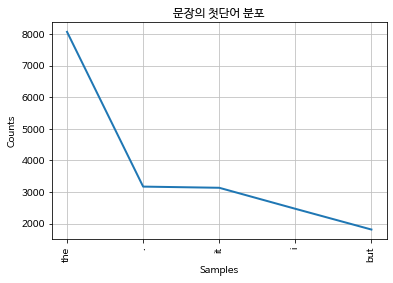

In [6]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
cfd["SS"].plot(5, title="문장의 첫단어 분포")
plt.show()

In [7]:
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

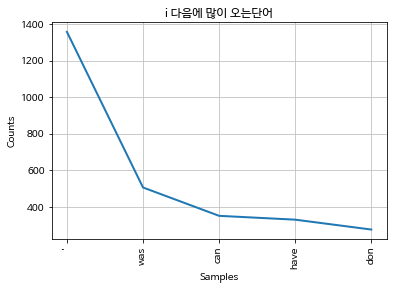

In [8]:
cfd["i"].plot(5, title='i 다음에 많이 나오는단어')

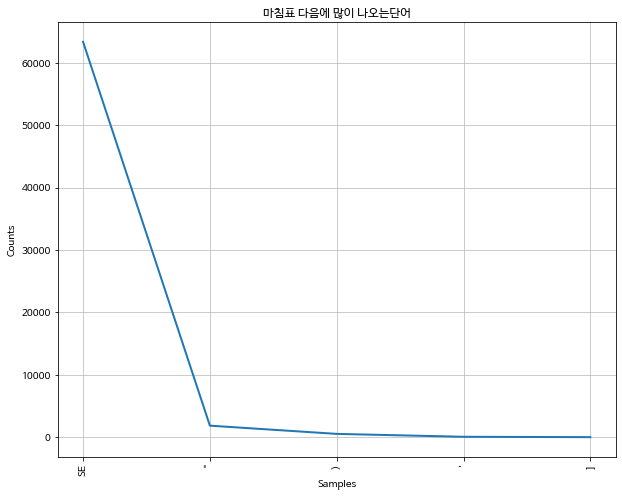

In [9]:
plt.figure(figsize=(10,8))
cfd["."].plot(5, title='마침표 다음에 많이 나오는단어')

In [11]:
# 조건부 확률 추정
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [20]:
# i 다음 am 이 올 확률
cpd["i"].prob('am') * 100

1.8562267971650355

In [21]:
cpd["i"].prob('is') * 100

0.02249971875351558

In [22]:
cpd["we"].prob('are') * 100

8.504504504504505

In [23]:
'''
P(SS I am a boy SE) = P(I | SS) * P(am | I) * ... * P(SE | .)
'''
import numpy as np

def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1):
        c = s[i]
        w = s[i+1]
        # log0을 방지하기 위해 극소값 더함
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [24]:
test_sentence = ["i", 'like', 'the', 'movie', '.']
sentence_score(test_sentence)

2.740764134071561e-06

In [25]:
test_sentence = ["i", 'like', 'the', '.', 'movie']
sentence_score(test_sentence)

4.079308451537719e-24

In [35]:
test_sentence = ['he', 'is', 'happy']
sentence_score(test_sentence)

2.9369294950672003e-05

In [36]:
test_sentence = ['is', 'he', 'happy', '?']
sentence_score(test_sentence)

1.475672226826618e-21

In [38]:
# 무작위 문장을 만들어 보자.
def generate_sentence(seed=None):
    if seed is not None:
        import random
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()

        if w == "SE":
            break
        else:
            w2 = w
        
        if c == "SS":
            sentence.append(w2.title())
        else:
            sentence.append(" " + w2)

        c = w2

    return "".join(sentence)

In [43]:
generate_sentence(500)

"Meanwhile ocp is an hbo ' ve seen a hefnerism ?"

In [45]:
%%time
!wget -nc -q https://raw.githubusercontent.com/e9t/nswc/master/ratings_train.txt

CPU times: user 2.31 ms, sys: 22.4 ms, total: 24.7 ms
Wall time: 220 ms


In [48]:
# import codecs
# with codecs.open("ratings_train.txt", encoding='utf-8') as f:
#     data = [line.split('\t') for line in f.read().splitlines()]
#     data = data[1:]

# docs = [row[1] for row in data]
# len(docs)

FileNotFoundError: ignored